In [6]:
import csv
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def csv_to_kvs(fileName):
    make_dictionary = {}
    with open(fileName,'r') as csvFile:
        csvreader = csv.reader(csvFile)
        for row in csvreader:
            #position 1 and following are integers
            make_dictionary[row[0]] = [int(val) for val in row[1:]]
        print(make_dictionary)
    return make_dictionary

C36=csv_to_kvs('C_36all.csv')  


print(len(C36.keys()))

keysListC36 = list(C36.keys()) 
print(keysListC36)

{'123.456': [123, 253, 354, 134, 146, 456, 265, 162], '123.465': [152, 123, 134, 145, 465, 364, 263, 256], '123.546': [123, 243, 345, 135, 156, 465, 264, 162], '123.564': [154, 142, 123, 135, 365, 263, 246, 456], '123.645': [243, 123, 152, 254, 456, 165, 136, 346], '123.654': [245, 253, 123, 142, 164, 136, 356, 465], '124.356': [143, 124, 254, 345, 356, 265, 162, 136], '124.365': [152, 124, 143, 135, 365, 346, 264, 256], '124.536': [354, 145, 124, 234, 263, 162, 156, 365], '124.563': [153, 132, 124, 145, 465, 264, 236, 356], '124.635': [124, 152, 253, 234, 364, 356, 165, 146], '124.653': [124, 132, 235, 254, 456, 365, 163, 146], '125.346': [245, 354, 153, 125, 162, 136, 346, 264], '125.364': [153, 134, 142, 125, 265, 246, 364, 356], '125.436': [235, 345, 154, 125, 162, 146, 364, 263], '125.463': [154, 143, 132, 125, 265, 236, 346, 456], '125.634': [243, 235, 125, 142, 164, 156, 365, 346], '125.643': [245, 125, 132, 234, 364, 163, 156, 465], '126.345': [152, 135, 345, 254, 246, 364, 163

In [7]:
%run module2x2x2_ext_match.ipynb

from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-16


# Investigating the number of buildable cubes using sets of 10 cubes

## Functions to use:

* **RandomKCubes**(dictionary, k)  <br>
dictionary = dictionary of cubes k = set of size k <br> output: a random selection of k cubes from dictionary

* **NumberBuildable4SetTENCubes**(a_collection_of_ten_cubes, dictionary_possible_targets_to_build)  <br>
a_collection_of_ten_cubes is the output of RandomKCubes  <br>
output: the number of cubes in dictionary_possible_targets_to_build that are buildable with a_collection_of_nine_cubes

* **DistributionBuildNum4SetsOfTen**(dictionary_sets, number_samples)

In [3]:
#Example selecting 10 random cubes from C36
RandomKCubes(C36, 10)

[[143, 345, 235, 132, 126, 256, 465, 164],
 [152, 124, 143, 135, 365, 346, 264, 256],
 [153, 134, 142, 125, 265, 246, 364, 356],
 [154, 142, 123, 135, 365, 263, 246, 456],
 [243, 254, 145, 134, 163, 156, 265, 236],
 [123, 243, 345, 135, 156, 465, 264, 162],
 [143, 234, 253, 135, 156, 265, 246, 164],
 [354, 245, 142, 134, 163, 126, 256, 365],
 [152, 145, 354, 253, 236, 346, 164, 126],
 [245, 253, 123, 142, 164, 136, 356, 465]]

In [4]:
def NumberBuildable4SetTENCubes(one_collection_of_ten, dictionary_for_targets): 
    keysList_targets = list(dictionary_for_targets.keys())
    TenSet = one_collection_of_ten
  
    Collections=list(it.combinations(TenSet, 8))
      
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])     

    #for each subset of 8 cubes, determine how many cubes are buildable
    for coll in Collections:
        a_solution_list=[]
            
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(coll, dictionary_for_targets[j])))
            
        newarray = np.array([w for w in a_solution_list])
        current_solution_array = current_solution_array + newarray
  
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
    return Number_buildable_cubes

In [ ]:
#Example (cont.) calculating the number of buildable cubes using a randomly selected set of 10
NumberBuildable4SetTENCubes(RandomKCubes(C36, 10), C36)

In [8]:
#in module2x2x2
def NumberBuildable4SetsSizeK(one_collection_of_k, dictionary_for_targets):
    k = len(one_collection_of_k)
    if k<8:
        return print("collection too small to build any targets")
    keysList_targets = list(dictionary_for_targets.keys())
    
    Collections=list(it.combinations(one_collection_of_k, 8))  
    current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])     

    #for each subset of 8 cubes, determine how many cubes are buildable
    for coll in Collections:
        a_solution_list=[]
            
        for j in keysList_targets:
            a_solution_list.append(CountingSolutions(CornerCountVector(coll, dictionary_for_targets[j])))
            
        newarray = np.array([w for w in a_solution_list])
        current_solution_array = current_solution_array + newarray
  
    Number_buildable_cubes = np.count_nonzero(current_solution_array)
    
    return Number_buildable_cubes

In [28]:
NumberBuildable4SetsSizeK(RandomKCubes(C36, 9), C36)

6

In [30]:
#in module2x2x2
def DistributionBuildNum4SetsOfK(k, dictionary_sets, number_samples):
    list_numberBuildable=[]
    for i in range(number_samples):
        set_size_k = RandomKCubes(dictionary_sets, k)
        n = NumberBuildable4SetsSizeK(set_size_k, dictionary_sets)
        list_numberBuildable.append(n)
        
    return list_numberBuildable

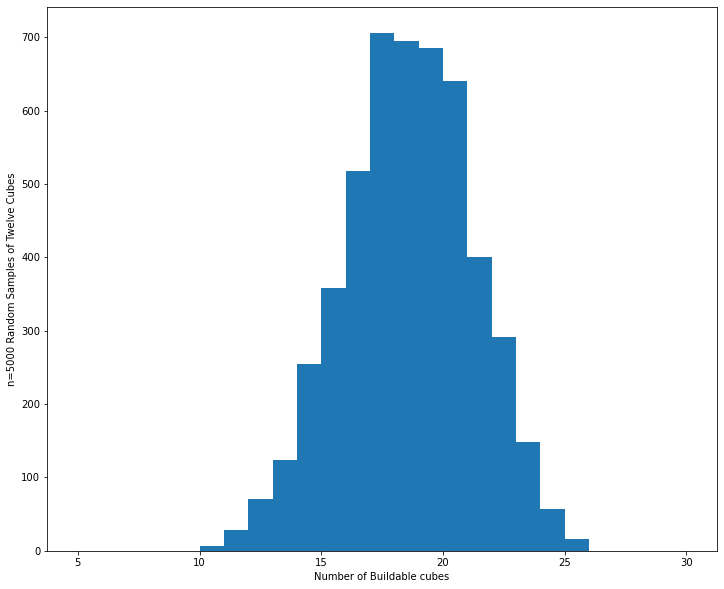

 25 :  16
 24 :  57
 23 :  148
 22 :  291
 21 :  401
 20 :  641
 19 :  686
 18 :  695
 17 :  706
 16 :  518
 15 :  358
 14 :  255
 13 :  124
 12 :  70
 11 :  28
 10 :  6
the average number of buildable cubes is 18.0818
the standard deviation of the number of buildable cubes is 2.6638558492525677


In [35]:
a=DistributionBuildNum4SetsOfK(12, C36, 5000)

import statistics

#histogram
fig, ax=plt.subplots(figsize=(12,10))
ax.hist(a, bins=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
plt.xlabel("Number of Buildable cubes")
plt.ylabel("n=5000 Random Samples of Twelve Cubes")
plt.show()

CountFrequency(a)

print("the average number of buildable cubes is", statistics.mean(a))
print("the standard deviation of the number of buildable cubes is", statistics.stdev(a)) 



From randomly selecting sets of 12, looks like the min# buildable is 9 and max# buildable is 26.  There are sets of 12 that build all thirty cubes, so those are exceedingly rare. <br>
<br>
Data from a random sample n=5000 sets of size 12<br>
25 :  14<br>
 24 :  68<br>
 23 :  157<br>
 22 :  282<br>
 21 :  480<br>
 20 :  625<br>
 19 :  676<br>
 18 :  704<br>
 17 :  647<br>
 16 :  558<br>
 15 :  324<br>
 14 :  252<br>
 13 :  122<br>
 12 :  76<br>
 11 :  10<br>
 10 :  4<br>
 9 :  1<br>
the average number of buildable cubes is 18.173<br>
the standard deviation of the number of buildable cubes is 2.65948972119003

In [29]:
def DistributionBuildNum4SetsOfTen(dictionary_sets, number_samples):
    list_numberBuildable=[]
    for i in range(number_samples):
        ten_set = RandomKCubes(dictionary_sets, 10)
        n = NumberBuildable4SetTENCubes(ten_set, dictionary_sets)
        list_numberBuildable.append(n)
        if n==14:
            print("these build 14", ten_set)
        
    return list_numberBuildable

these build 14 [[243, 235, 125, 142, 164, 156, 365, 346], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [123, 243, 345, 135, 156, 465, 264, 162], [245, 253, 123, 142, 164, 136, 356, 465]]
these build 14 [[245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263], [152, 123, 134, 145, 465, 364, 263, 256], [152, 124, 143, 135, 365, 346, 264, 256], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164], [243, 142, 154, 345, 356, 165, 126, 236], [153, 354, 234, 132, 126, 246, 456, 165]]
these build 14 [[143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [154, 142, 123, 135, 365, 26

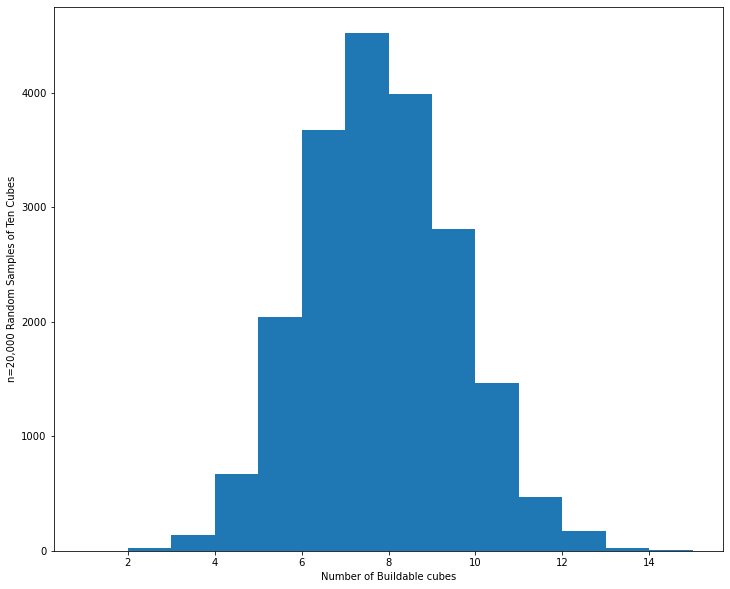

 14 :  8
 13 :  28
 12 :  174
 11 :  471
 10 :  1467
 9 :  2805
 8 :  3985
 7 :  4519
 6 :  3672
 5 :  2037
 4 :  668
 3 :  140
 2 :  26
the average number of buildable cubes is 7.3267
the standard deviation of the number of buildable cubes is 1.7361502875301562


In [26]:
#Example, distribution of the number of buildable cubes for n=20000 sets of 10 cubes
a = DistributionBuildNum4SetsOfTen(C36, 20000)

import statistics

#histogram
fig, ax=plt.subplots(figsize=(12,10))
ax.hist(a, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.xlabel("Number of Buildable cubes")
plt.ylabel("n=20,000 Random Samples of Ten Cubes")
plt.show()

CountFrequency(a)

print("the average number of buildable cubes is", statistics.mean(a))
print("the standard deviation of the number of buildable cubes is", statistics.stdev(a)) 

## Conjecture: A set of 10 cubes in C36 can build no more than 14 targets.

Here is an example that builds 14 targets.
<br>
**These 10 cubes build 14 targets** 
[[143, 234, 253, 135, 156, 265, 246, 164], [152, 145, 354, 253, 236, 346, 164, 126], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [243, 142, 154, 345, 356, 165, 126, 236], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263]]

**These 10 cubes build 14 targets** [[243, 123, 152, 254, 456, 165, 136, 346], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [235, 345, 154, 125, 162, 146, 364, 263], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [154, 142, 123, 135, 365, 263, 246, 456], [123, 253, 354, 134, 146, 456, 265, 162]]


## Displaying sets of 10 cubes that build 14 targets 

The tableau is depicted in green with the selected cubes in dark blue and blank diagonal entries in yellow.

these cubes are Buildable:
['123.456', '123.564', '124.356', '124.536', '124.563', '124.635', '125.463', '125.634', '126.345', '126.354', '126.435', '126.453', '135.426', '136.425']
the original set of cubes


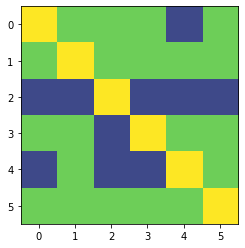

the set of buildable targets


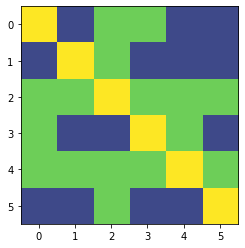

In [21]:
TenCubesBuildFourteenTargets = [[143, 234, 253, 135, 156, 265, 246, 164], [152, 145, 354, 253, 236, 346, 164, 126], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [243, 142, 154, 345, 356, 165, 126, 236], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [354, 145, 124, 234, 263, 162, 156, 365], [235, 345, 154, 125, 162, 146, 364, 263]]
List10Names= CubeCornersListToNames(TenCubesBuildFourteenTargets, C36)
DisplaySetCubesandBuildableTargets(List10Names, C36)

these cubes are Buildable:
['123.465', '123.546', '123.564', '123.645', '124.356', '124.653', '125.463', '125.634', '126.345', '126.435', '134.625', '135.624', '136.425', '136.524']
the original set of cubes


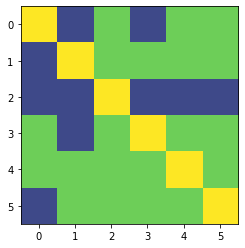

the set of buildable targets


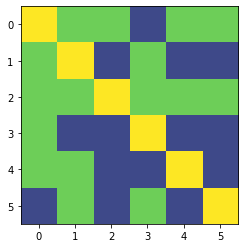

In [28]:
TenCubesBuildFourteenTargets2 = [[243, 123, 152, 254, 456, 165, 136, 346], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [235, 345, 154, 125, 162, 146, 364, 263], [235, 153, 145, 254, 246, 164, 136, 263], [245, 253, 123, 142, 164, 136, 356, 465], [243, 254, 145, 134, 163, 156, 265, 236], [143, 345, 235, 132, 126, 256, 465, 164], [154, 142, 123, 135, 365, 263, 246, 456], [123, 253, 354, 134, 146, 456, 265, 162]]
List10Names2= CubeCornersListToNames(TenCubesBuildFourteenTargets2, C36)
DisplaySetCubesandBuildableTargets(List10Names2, C36)

In [29]:
#lists of 10 cubes that build 14 targets:
ListsOf10Cubes=[
[[143, 345, 235, 132, 126, 256, 465, 164], [243, 254, 145, 134, 163, 156, 265, 236], [153, 132, 124, 145, 465, 264, 236, 356], [154, 142, 123, 135, 365, 263, 246, 456], [243, 123, 152, 254, 456, 165, 136, 346], [143, 234, 253, 135, 156, 265, 246, 164], [245, 354, 153, 125, 162, 136, 346, 264], [152, 145, 354, 253, 236, 346, 164, 126], [354, 245, 142, 134, 163, 126, 256, 365], [124, 152, 253, 234, 364, 356, 165, 146]],
[[243, 142, 154, 345, 356, 165, 126, 236], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146], [143, 124, 254, 345, 356, 265, 162, 136], [154, 142, 123, 135, 365, 263, 246, 456], [245, 125, 132, 234, 364, 163, 156, 465], [154, 143, 132, 125, 265, 236, 346, 456], [123, 253, 354, 134, 146, 456, 265, 162], [235, 153, 145, 254, 246, 164, 136, 263], [245, 354, 153, 125, 162, 136, 346, 264]],
[[354, 145, 124, 234, 263, 162, 156, 365], [123, 243, 345, 135, 156, 465, 264, 162], [243, 254, 145, 134, 163, 156, 265, 236], [245, 154, 135, 253, 236, 163, 146, 264], [143, 154, 245, 234, 263, 256, 165, 136], [153, 134, 142, 125, 265, 246, 364, 356], [245, 253, 123, 142, 164, 136, 356, 465], [243, 235, 125, 142, 164, 156, 365, 346], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164]],
[[243, 254, 145, 134, 163, 156, 265, 236], [153, 354, 234, 132, 126, 246, 456, 165], [143, 234, 253, 135, 156, 265, 246, 164], [154, 142, 123, 135, 365, 263, 246, 456], [123, 253, 354, 134, 146, 456, 265, 162], [152, 123, 134, 145, 465, 364, 263, 256], [152, 135, 345, 254, 246, 364, 163, 126], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465], [235, 345, 154, 125, 162, 146, 364, 263]],
[[235, 153, 145, 254, 246, 164, 136, 263], [153, 235, 243, 134, 146, 264, 256, 165], [154, 142, 123, 135, 365, 263, 246, 456], [354, 145, 124, 234, 263, 162, 156, 365], [243, 254, 145, 134, 163, 156, 265, 236], [245, 354, 153, 125, 162, 136, 346, 264], [143, 345, 235, 132, 126, 256, 465, 164], [124, 152, 253, 234, 364, 356, 165, 146], [152, 123, 134, 145, 465, 364, 263, 256], [354, 245, 142, 134, 163, 126, 256, 365]],
[[154, 143, 132, 125, 265, 236, 346, 456], [243, 235, 125, 142, 164, 156, 365, 346], [153, 132, 124, 145, 465, 264, 236, 356], [143, 345, 235, 132, 126, 256, 465, 164], [153, 235, 243, 134, 146, 264, 256, 165], [143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [245, 354, 153, 125, 162, 136, 346, 264], [153, 354, 234, 132, 126, 246, 456, 165], [245, 154, 135, 253, 236, 163, 146, 264]],
[[153, 235, 243, 134, 146, 264, 256, 165], [354, 145, 124, 234, 263, 162, 156, 365], [123, 253, 354, 134, 146, 456, 265, 162], [124, 152, 253, 234, 364, 356, 165, 146], [154, 143, 132, 125, 265, 236, 346, 456], [235, 153, 145, 254, 246, 164, 136, 263], [243, 123, 152, 254, 456, 165, 136, 346], [243, 142, 154, 345, 356, 165, 126, 236], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162]],
[[154, 142, 123, 135, 365, 263, 246, 456], [154, 143, 132, 125, 265, 236, 346, 456], [243, 123, 152, 254, 456, 165, 136, 346], [235, 345, 154, 125, 162, 146, 364, 263], [245, 253, 123, 142, 164, 136, 356, 465], [124, 152, 253, 234, 364, 356, 165, 146], [152, 135, 345, 254, 246, 364, 163, 126], [354, 145, 124, 234, 263, 162, 156, 365], [143, 154, 245, 234, 263, 256, 165, 136], [153, 235, 243, 134, 146, 264, 256, 165]],
[[243, 235, 125, 142, 164, 156, 365, 346], [243, 254, 145, 134, 163, 156, 265, 236], [153, 132, 124, 145, 465, 264, 236, 356], [124, 132, 235, 254, 456, 365, 163, 146], [124, 152, 253, 234, 364, 356, 165, 146], [143, 124, 254, 345, 356, 265, 162, 136], [143, 234, 253, 135, 156, 265, 246, 164], [243, 142, 154, 345, 356, 165, 126, 236], [152, 123, 134, 145, 465, 364, 263, 256], [245, 354, 153, 125, 162, 136, 346, 264]],
[[243, 235, 125, 142, 164, 156, 365, 346], [124, 152, 253, 234, 364, 356, 165, 146], [245, 253, 123, 142, 164, 136, 356, 465], [354, 245, 142, 134, 163, 126, 256, 365], [123, 243, 345, 135, 156, 465, 264, 162], [153, 132, 124, 145, 465, 264, 236, 356], [152, 135, 345, 254, 246, 364, 163, 126], [123, 253, 354, 134, 146, 456, 265, 162], [154, 143, 132, 125, 265, 236, 346, 456], [143, 154, 245, 234, 263, 256, 165, 136]],
[[152, 135, 345, 254, 246, 364, 163, 126], [243, 254, 145, 134, 163, 156, 265, 236], [152, 124, 143, 135, 365, 346, 264, 256], [153, 354, 234, 132, 126, 246, 456, 165], [123, 253, 354, 134, 146, 456, 265, 162], [243, 142, 154, 345, 356, 165, 126, 236], [235, 345, 154, 125, 162, 146, 364, 263], [124, 152, 253, 234, 364, 356, 165, 146], [245, 253, 123, 142, 164, 136, 356, 465], [154, 142, 123, 135, 365, 263, 246, 456]],
[[243, 235, 125, 142, 164, 156, 365, 346], [143, 345, 235, 132, 126, 256, 465, 164], [153, 134, 142, 125, 265, 246, 364, 356], [243, 123, 152, 254, 456, 165, 136, 346], [245, 154, 135, 253, 236, 163, 146, 264], [152, 123, 134, 145, 465, 364, 263, 256], [354, 145, 124, 234, 263, 162, 156, 365], [154, 143, 132, 125, 265, 236, 346, 456], [123, 243, 345, 135, 156, 465, 264, 162], [245, 253, 123, 142, 164, 136, 356, 465]],
[[245, 154, 135, 253, 236, 163, 146, 264], [143, 124, 254, 345, 356, 265, 162, 136], [245, 125, 132, 234, 364, 163, 156, 465], [235, 153, 145, 254, 246, 164, 136, 263], [152, 123, 134, 145, 465, 364, 263, 256], [152, 124, 143, 135, 365, 346, 264, 256], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164], [243, 142, 154, 345, 356, 165, 126, 236], [153, 354, 234, 132, 126, 246, 456, 165]],
[[143, 345, 235, 132, 126, 256, 465, 164], [354, 145, 124, 234, 263, 162, 156, 365], [154, 142, 123, 135, 365, 263, 246, 456], [152, 135, 345, 254, 246, 364, 163, 126], [152, 145, 354, 253, 236, 346, 164, 126], [243, 254, 145, 134, 163, 156, 265, 236], [124, 132, 235, 254, 456, 365, 163, 146], [245, 354, 153, 125, 162, 136, 346, 264], [152, 124, 143, 135, 365, 346, 264, 256], [124, 152, 253, 234, 364, 356, 165, 146]],
[[143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [124, 132, 235, 254, 456, 365, 163, 146], [153, 354, 234, 132, 126, 246, 456, 165], [124, 152, 253, 234, 364, 356, 165, 146], [143, 154, 245, 234, 263, 256, 165, 136], [243, 123, 152, 254, 456, 165, 136, 346], [354, 245, 142, 134, 163, 126, 256, 365], [154, 143, 132, 125, 265, 236, 346, 456], [235, 345, 154, 125, 162, 146, 364, 263]],
[[143, 124, 254, 345, 356, 265, 162, 136], [152, 123, 134, 145, 465, 364, 263, 256], [245, 354, 153, 125, 162, 136, 346, 264], [245, 154, 135, 253, 236, 163, 146, 264], [153, 354, 234, 132, 126, 246, 456, 165], [154, 142, 123, 135, 365, 263, 246, 456], [243, 235, 125, 142, 164, 156, 365, 346], [143, 234, 253, 135, 156, 265, 246, 164], [123, 253, 354, 134, 146, 456, 265, 162], [152, 135, 345, 254, 246, 364, 163, 126]],
[[124, 132, 235, 254, 456, 365, 163, 146], [143, 154, 245, 234, 263, 256, 165, 136], [152, 145, 354, 253, 236, 346, 164, 126], [123, 243, 345, 135, 156, 465, 264, 162], [152, 124, 143, 135, 365, 346, 264, 256], [245, 253, 123, 142, 164, 136, 356, 465], [143, 345, 235, 132, 126, 256, 465, 164], [243, 142, 154, 345, 356, 165, 126, 236], [123, 253, 354, 134, 146, 456, 265, 162], [153, 134, 142, 125, 265, 246, 364, 356]],
[[245, 253, 123, 142, 164, 136, 356, 465], [245, 354, 153, 125, 162, 136, 346, 264], [152, 135, 345, 254, 246, 364, 163, 126], [152, 123, 134, 145, 465, 364, 263, 256], [143, 234, 253, 135, 156, 265, 246, 164], [153, 132, 124, 145, 465, 264, 236, 356], [123, 253, 354, 134, 146, 456, 265, 162], [124, 132, 235, 254, 456, 365, 163, 146], [243, 142, 154, 345, 356, 165, 126, 236], [243, 235, 125, 142, 164, 156, 365, 346]],
[[243, 254, 145, 134, 163, 156, 265, 236], [152, 124, 143, 135, 365, 346, 264, 256], [245, 354, 153, 125, 162, 136, 346, 264], [354, 145, 124, 234, 263, 162, 156, 365], [143, 234, 253, 135, 156, 265, 246, 164], [143, 345, 235, 132, 126, 256, 465, 164], [245, 125, 132, 234, 364, 163, 156, 465], [124, 152, 253, 234, 364, 356, 165, 146], [154, 142, 123, 135, 365, 263, 246, 456], [153, 132, 124, 145, 465, 264, 236, 356]]]

these cubes are Buildable:
['123.456', '123.546', '123.564', '123.645', '123.654', '124.365', '124.536', '125.364', '125.436', '125.463', '126.354', '126.435', '135.624', '136.425']
the original set of cubes


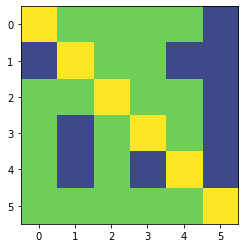

the set of buildable targets


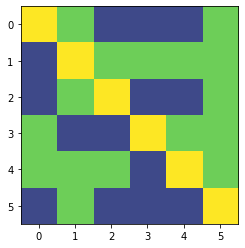

In [46]:
ListsOf_10Names=list(CubeCornersListToNames(i, C36) for i in ListsOf10Cubes)
DisplaySetCubesandBuildableTargets(ListsOf_10Names[15], C36)

these cubes are Buildable:
['123.465', '123.546', '124.356', '124.365', '124.536', '124.563', '124.653', '125.634', '125.643', '126.435', '126.543', '135.426', '135.624', '136.524']
the original set of cubes


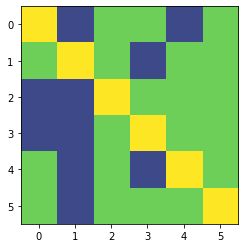

the set of buildable targets


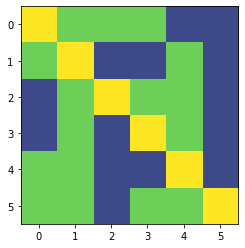

In [52]:
DisplaySetCubesandBuildableTargets(ListsOf_10Names[18], C36)

In [ ]:

#this calculation takes too long - 3 days no output when dictionary_sets=dictionary_targets=C36, and set_size=8
#works fine for smaller dictionary_sets = Haraguchi's set
def Distribution4NumberBuildableCubes(dictionary_sets, dictionary_targets, set_size):
    keysList_targets = list(dictionary_targets.keys())
    keysList_sets = list(dictionary_sets.keys())
    
    SetsOfSizeN=list(it.combinations(keysList_sets, set_size))
    n=len(SetsOfSizeN)

    print("there are", n, "sets of", set_size, "cubes")
    
    list_buildable_counts=[]
    for i in range(n):
        current_solution_array=np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        Collections=list(it.combinations(SetsOfSizeN[i], 8))
    
        for coll in Collections:
            solution_list_for_coll=[]
            eight_cubes=[C36[key] for key in coll]

            for j in keysList_targets:
                solution_list_for_coll.append(CountingSolutions(CornerCountVector(eight_cubes, C36[j])))
            
            #print(solution_list_for_coll)
            newarray = np.array([k for k in solution_list_for_coll ])
            current_solution_array = current_solution_array + newarray
        
        Number_buildable_cubes = np.count_nonzero(current_solution_array)     
        #print(Number_buildable_cubes, current_solution_array)
        list_buildable_counts.append(Number_buildable_cubes)

    return CountFrequency(list_buildable_counts)